[3]
Kershenobich, D., Fierro, F. J., & Rojkind, M. (1970). The relationship between the free pool of proline and collagen content in human liver cirrhosis. The Journal of Clinical Investigation, 49(12), 2246-2249.

[4]
Hollander, M., Wolfe, D. A., & Chicken, E. (2013). Nonparametric statistical methods. John Wiley & Sons.

[5]
B. Phipson and G. K. Smyth. “Permutation P-values Should Never Be Zero: Calculating Exact P-values When Permutations Are Randomly Drawn.” Statistical Applications in Genetics and Molecular Biology 9.1 (2010).

[6]
Ludbrook, J., & Dudley, H. (1998). Why permutation tests are superior to t and F tests in biomedical research. The American Statistician, 52(2), 127-132.

Consider the following data from [3], which studied the relationship between free proline (an amino acid) and total collagen (a protein often found in connective tissue) in unhealthy human livers.

The `x` and `y` arrays below record measurements of the two compounds. The observations are paired: each free proline measurement was taken from the same liver as the total collagen measurement at the same index.

In [19]:
import numpy as np
# total collagen (mg/g dry weight of liver)
x = np.array([7.1, 7.1, 7.2, 8.3, 9.4, 10.5, 11.4])
# free proline (μ mole/g dry weight of liver)
y = np.array([2.8, 2.9, 2.8, 2.6, 3.5, 4.6, 5.0])

These data were analyzed in [4] using Spearman’s correlation coefficient, a statistic sensitive to monotonic correlation between the samples. Here, we will analyze the data using Pearon's correlation coefficient which is sensitive to linear corrlation.

In [57]:
from scipy import stats
res = stats.pearsonr(x, y)
res.statistic

0.9347467974524516

The value of this statistic tends to be high (close to 1) for samples with a strongly positive linear correlation, low (close to -1) for samples with a strongly negative linear correlation, and small in magnitude (close to zero) for samples with weak linear correlation.

The test is performed by comparing the observed value of the statistic against the null distribution: the distribution of statistic values derived under the null hypothesis that total collagen and free proline measurements are drawn from independent normal distributions, so the population correlation coefficient is zero.

Under the null hypothesis, the probability density function of the sample correlation coefficent $r$ is that of the beta distribution with equal shape parameters $a = b = \frac{n}{2}-1$ on the interval $(-1, 1)$, where $n$ is the number of observations in each sample.

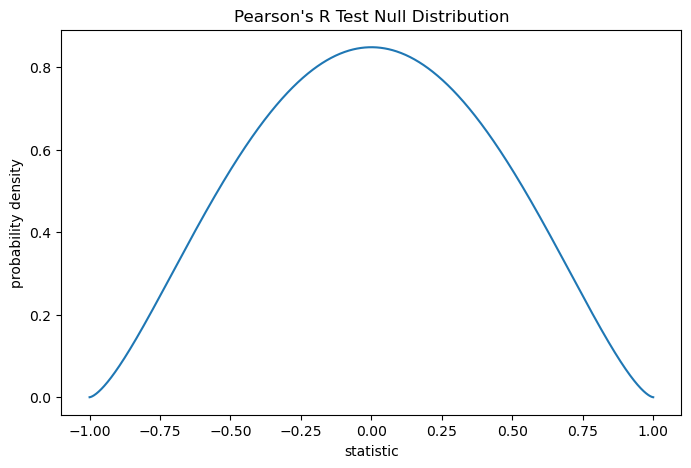

In [58]:
import matplotlib.pyplot as plt
n = len(x)  # len(x) == len(y)
a = b = n/2 - 1  # shape parameter
loc, scale = -1, 2  # support is (-1, 1)
dist = stats.beta(a=a, b=b, loc=loc, scale=scale)
r_vals = np.linspace(-1, 1, 1000)
pdf = dist.pdf(r_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(r_vals, pdf)
    ax.set_title("Pearson's R Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

The comparison is quantified by the p-value: the proportion of values in the null distribution as extreme or more extreme than the observed value of the statistic. In a two-sided test in which the statistic is positive, elements of the null distribution greater than the transformed statistic and elements of the null distribution less than the negative of the observed statistic are both considered “more extreme”.

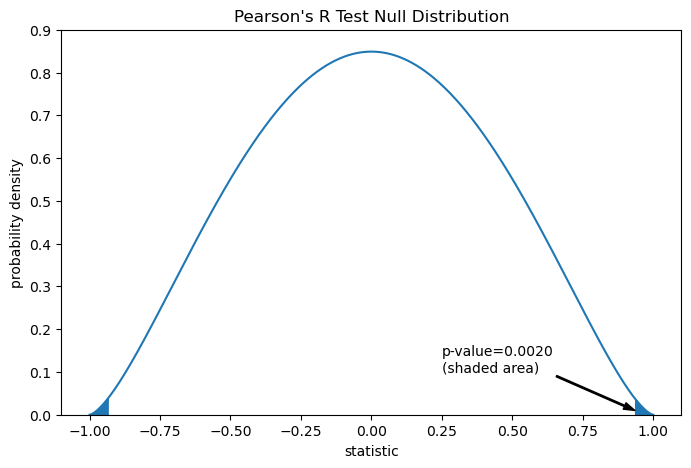

In [59]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
rs = res.statistic  # original statistic
pvalue = dist.cdf(-rs) + dist.sf(rs)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (rs, 0.01), (0.25, 0.1), arrowprops=props)
i = r_vals >= rs
ax.fill_between(r_vals[i], y1=0, y2=pdf[i], color='C0')
i = r_vals <= -rs
ax.fill_between(r_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(0, 0.9)
plt.show()

In [60]:
res.pvalue  # two-sided p-value

0.002016532795489373

If the p-value is "small" - that is, if there is a low probability of sampling data from independent normal distributions that produces such an extreme value of the statistic - this may be taken as evidence against the null hypothesis in favor of the alternative: the distribution of total collagen and free proline are not independent. Note that:

- The inverse is not true; that is, the test is not used to provide evidence for the null hypothesis.
- The threshold for values that will be considered "small" is a choice that should be made before the data is analyzed [5] with consideration of the risks of both false positives (incorrectly rejecting the null hypothesis) and false negatives (failure to reject a false null hypothesis).
- Small p-values are not evidence for a large effect; rather, they can only provide evidence for a "significant" effect, meaning that they are unlikely to have occurred under the null hypothesis.

Suppose that before performing the experiment, the authors had reason to predict a positive linear correlation between the total collagen and free proline measurements, and that they had chosen to assess the plausibility of the null hypothesis against a one-sided alternative: free proline has a positive ordinal correlation with total collagen. In this case, only those values in the null distribution that are as great or greater than the observed statistic are considered to be more extreme.

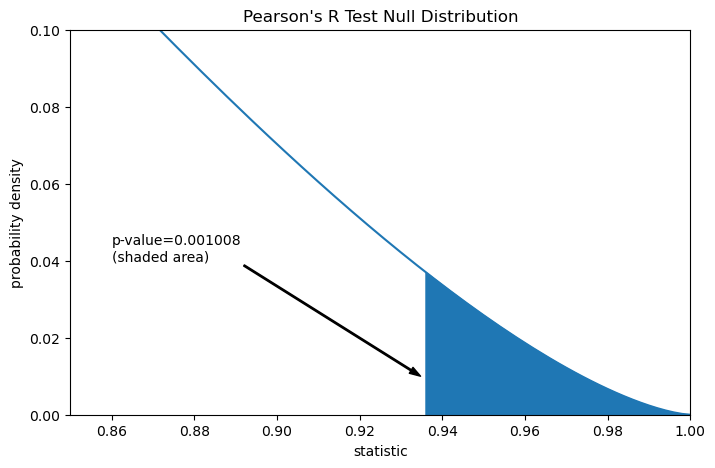

In [61]:
res = stats.pearsonr(x, y, alternative='greater')
res.statistic
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(rs)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (rs, 0.01), (0.86, 0.04), arrowprops=props)
i = r_vals >= rs
ax.fill_between(r_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(0.85, 1)
ax.set_ylim(0, 0.1)
plt.show()

In [63]:
res.pvalue  # one-sided p-value; half of the two-sided p-value

0.0010082663977446864

Note that the beta distribution is exact for samples of any size under the null hypothesis that the samples were drawn from a normal distribution. We can confirm this by computing a Monte Carlo null distribution: explicitly drawing samples from normal distributions and computing Pearson's statistic for each pair.

In [ ]:
# method = stats.MonteCarloMethod(rvs=(rng.norm, rng.norm))

However, the suppose the samples were drawn from independent but non-normal distributions. In some cases, it may be more likely to observe high values of the correlation coefficient than the beta distribution would suggest, and so the rate of false positives could be different from our chosen threshold. In such cases, it may be more appropriate to perform a permutation test: Under the null hypothesis that total collagen and free proline are independent, each of the free proline measurements were equally likely to have been observed with any of the total collagen measurements. Therefore, we can form an exact null distribution by calculating the statistic under each possible pairing of elements between `x` and `y`.

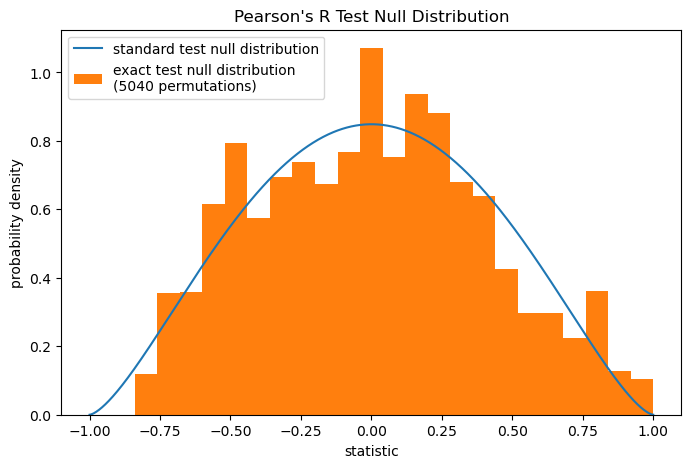

In [77]:
def statistic(x):  # explore all possible pairings by permuting `x`
    rs = stats.pearsonr(x, y).statistic  # ignore pvalue
    return rs
ref = stats.permutation_test((x,), statistic, alternative='greater',
                             permutation_type='pairings')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(ref.null_distribution, np.linspace(-1, 1, 26),
        density=True)
ax.legend(['standard test null distribution',
           f'exact test null distribution \n({len(ref.null_distribution)} permutations)'])
plt.show()

In [75]:
ref.pvalue  # exact one-sided p-value

0.005555555555555556